<a href="https://colab.research.google.com/github/hashemi124/ANN_edu_deep/blob/master/mvision_cal101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from keras.datasets import mnist
from keras import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import glob
from skimage import io
import os
import scipy.misc

from keras import regularizers
import csv
from keras.applications.inception_v3 import InceptionV3, preprocess_input

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
datasets_path = '/content/drive/My Drive/Colab Notebooks/Caltech101/train' #Add the path to the unzipped folder

def load_images(path,n=0):
    X = []
    Y=[]
    i=-1
    labels = []
    for label in os.listdir(path):
        back_path = os.path.join(path,label)
        labels.append(label)
        i = i+1
        for filename in os.listdir(back_path):
            image_path = os.path.join(back_path,filename)
            img = image.load_img(image_path,target_size=(224,224))
            img = image.img_to_array(img)
            #Y.append(image)
            #image = imresize(image,[128,128,3])
            #image = imresize(imread(image_path), [128,128, 3])
            #image = image.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            #image = image/255
            #image = 1-image
            Y.append(i)
            X.append(img)
            #X.append(image.img_to_array(img))
            #X.append(image)
    return X,Y,labels

x_train,y,label_data = load_images(datasets_path)
X = np.array(x_train)
#print(len(x_train))
#print(x_train.shape)
Y = np.array(y)
print(X.shape)

(450, 224, 224, 3)


In [4]:
datasets_path = '/content/drive/My Drive/Colab Notebooks/Caltech101/test' #Add the path to the unzipped folder

def load_images(path,n=0):
    X = []
    Y=[]
    i=-1
    labels = []
    for label in os.listdir(path):
        back_path = os.path.join(path,label)
        labels.append(label)
        i = i+1
        for filename in os.listdir(back_path):
            image_path = os.path.join(back_path,filename)
            img = image.load_img(image_path,target_size=(224,224))
            img = image.img_to_array(img)
            #Y.append(image)
            #image = imresize(image,[128,128,3])
            #image = imresize(imread(image_path), [128,128, 3])
            #image = image.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            #image = image/255
            #image = 1-image
            Y.append(i)
            X.append(img)
            #X.append(image.img_to_array(img))
            #X.append(image)
    return X,Y,labels

x,y,label_data = load_images(datasets_path)
X_test= np.array(x)
#print(len(x_train))
#print(x_train.shape)
Y_test = np.array(y)
print(X_test.shape)

(2856, 224, 224, 3)


In [5]:
print("Shape of training data:")
print(X.shape)
print(Y.shape)
print("Shape of test data:")
print(X_test.shape)
print(Y_test.shape)

Shape of training data:
(450, 224, 224, 3)
(450,)
Shape of test data:
(2856, 224, 224, 3)
(2856,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


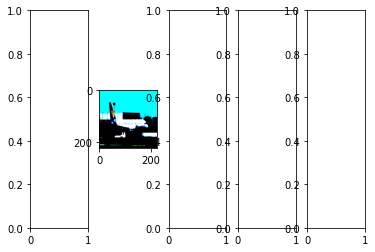

In [17]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 5)
axarr[1].imshow(X[11])
#plt.show()

In [18]:
from keras.utils.np_utils import to_categorical   

In [20]:
y_train = to_categorical(Y, num_classes=15)
y_test = to_categorical(Y_test, num_classes=15)
X_train = X.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


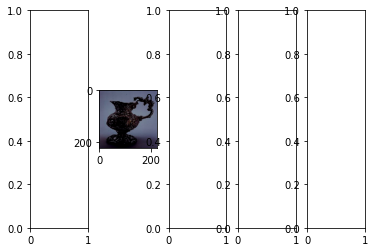

In [23]:
f, axarr = plt.subplots(1, 5)
axarr[1].imshow(X_train[160])
#plt.show()

In [24]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(450, 224, 224, 3)
(450, 15)
Shape of test data:
(2856, 224, 224, 3)
(2856, 15)


In [3]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(224, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(224, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(15, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)